## IMPORTING LIBRARIES AND MOUNTING CSV

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1E6smaTjMHv6MAKTu_eH90ASOj2AxNLVc?usp=sharing)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Reading the dataset from excel sheet provided...
data=pd.read_csv('/content/drive/MyDrive/survey lung cancer.csv')

type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# DATASET INFORMATION 

Total no. of attributes:16 Nos

 Attribute information:
 1. Gender: M(male), F(female)
 2. Age: Age of the patient
 3. Smoking: YES=2 , NO=1.
 4. Yellow fingers: YES=2 , NO=1.
 5. Anxiety: YES=2 , NO=1.
 6. Peer_pressure: YES=2 , NO=1.
 7. Chronic Disease: YES=2 , NO=1.
 8. Fatigue: YES=2 , NO=1.
 9. Allergy: YES=2 , NO=1.
 10. Wheezing: YES=2 , NO=1.
 11. Alcohol: YES=2 , NO=1.
 12. Coughing: YES=2 , NO=1.
 13. Shortness of Breath: YES=2 , NO=1.
 14. Swallowing Difficulty: YES=2 , NO=1.
 15. Chest pain: YES=2 , NO=1.
 16. Lung Cancer: YES , NO.

In [6]:
print("number of rows of the dataset: ",data.shape[0],"\t","number of rows of the dataset:",data.shape[1])

number of rows of the dataset:  309 	 number of rows of the dataset: 16


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
print("STATISTICAL INFORMATION ABOUT THE DATASET:","\t")
print("")
print(data.describe())

STATISTICAL INFORMATION ABOUT THE DATASET: 	

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    

In [9]:
print("Is the data having all columns or not?")
data.isnull().sum()

Is the data having all columns or not?


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


In [11]:
#let us make the dataset more read-able

data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})
data_temp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


lets create a dataframe with only positive cancer values

In [12]:
data_temp_positive = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_positive.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


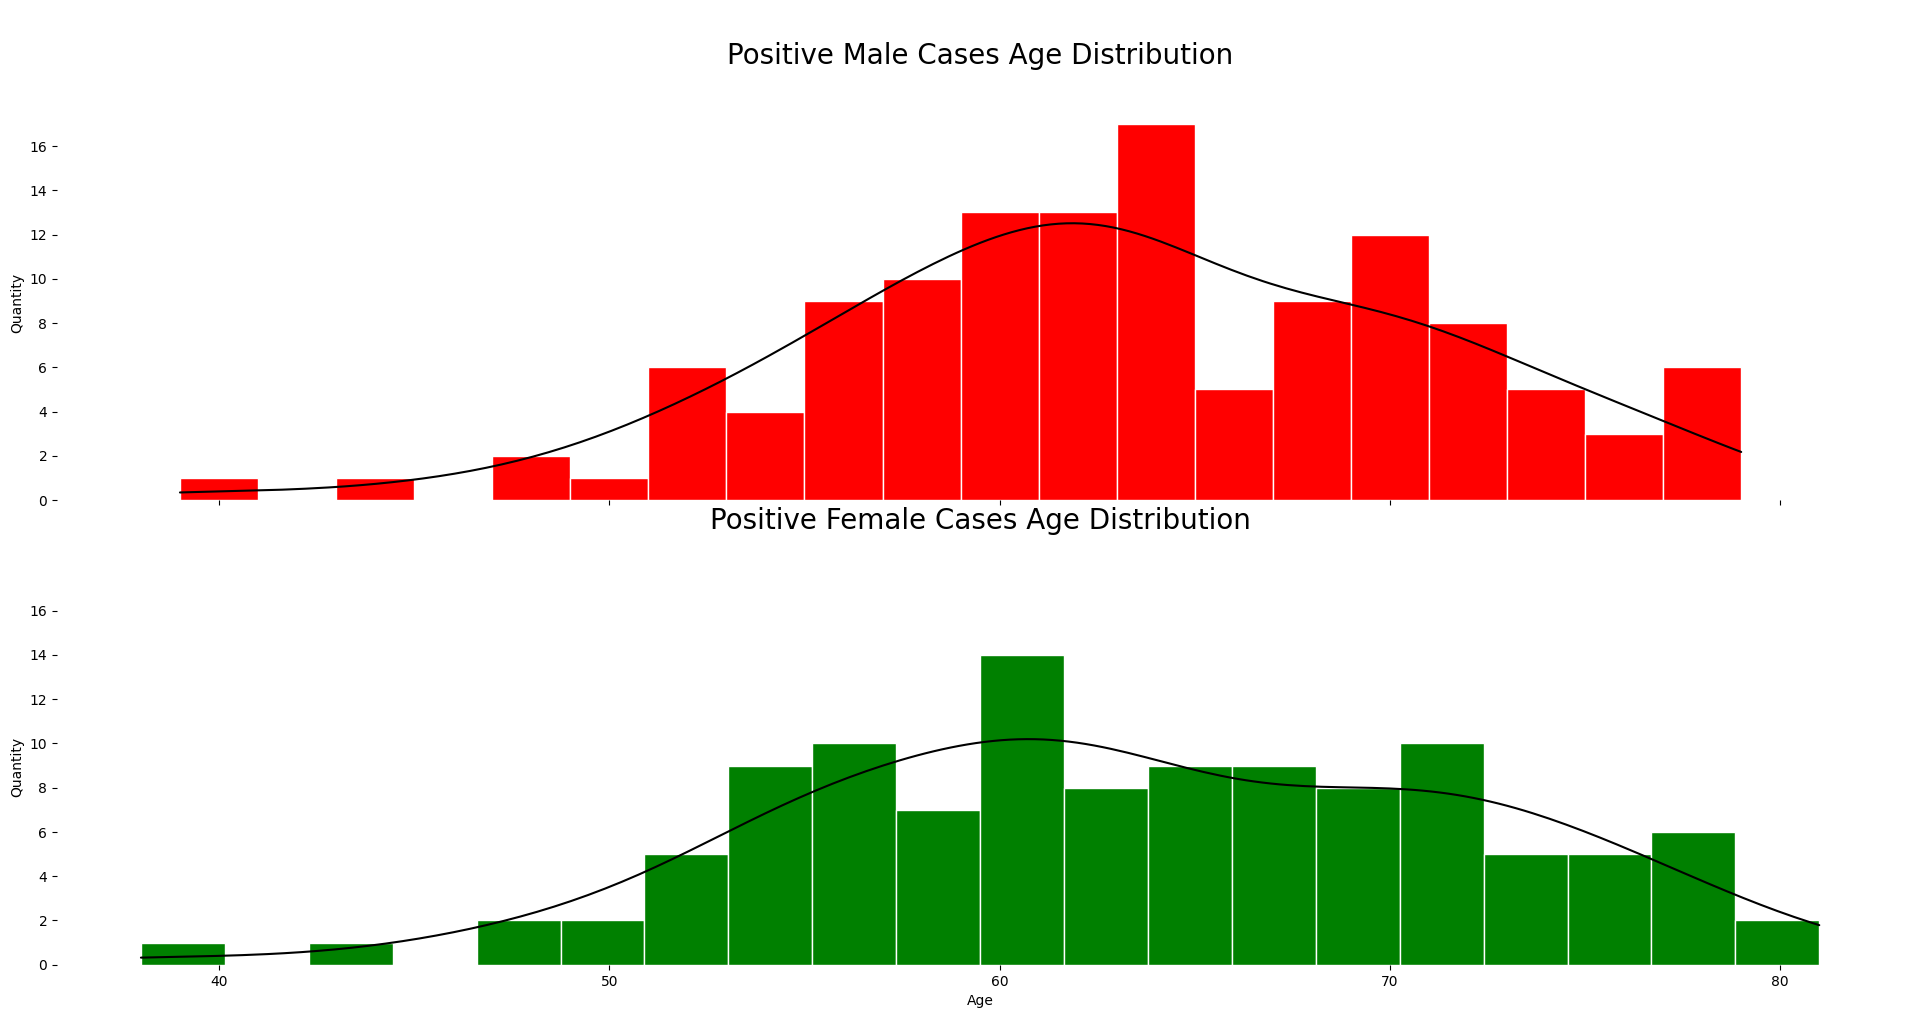

In [13]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.set_style("whitegrid")
sns.histplot(data_temp_positive[data_temp_positive["GENDER"]=="Male"]["AGE"],color='Red',kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color('black')
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_positive[data_temp_positive["GENDER"]=="Female"]["AGE"],color='green',kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color('black')
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

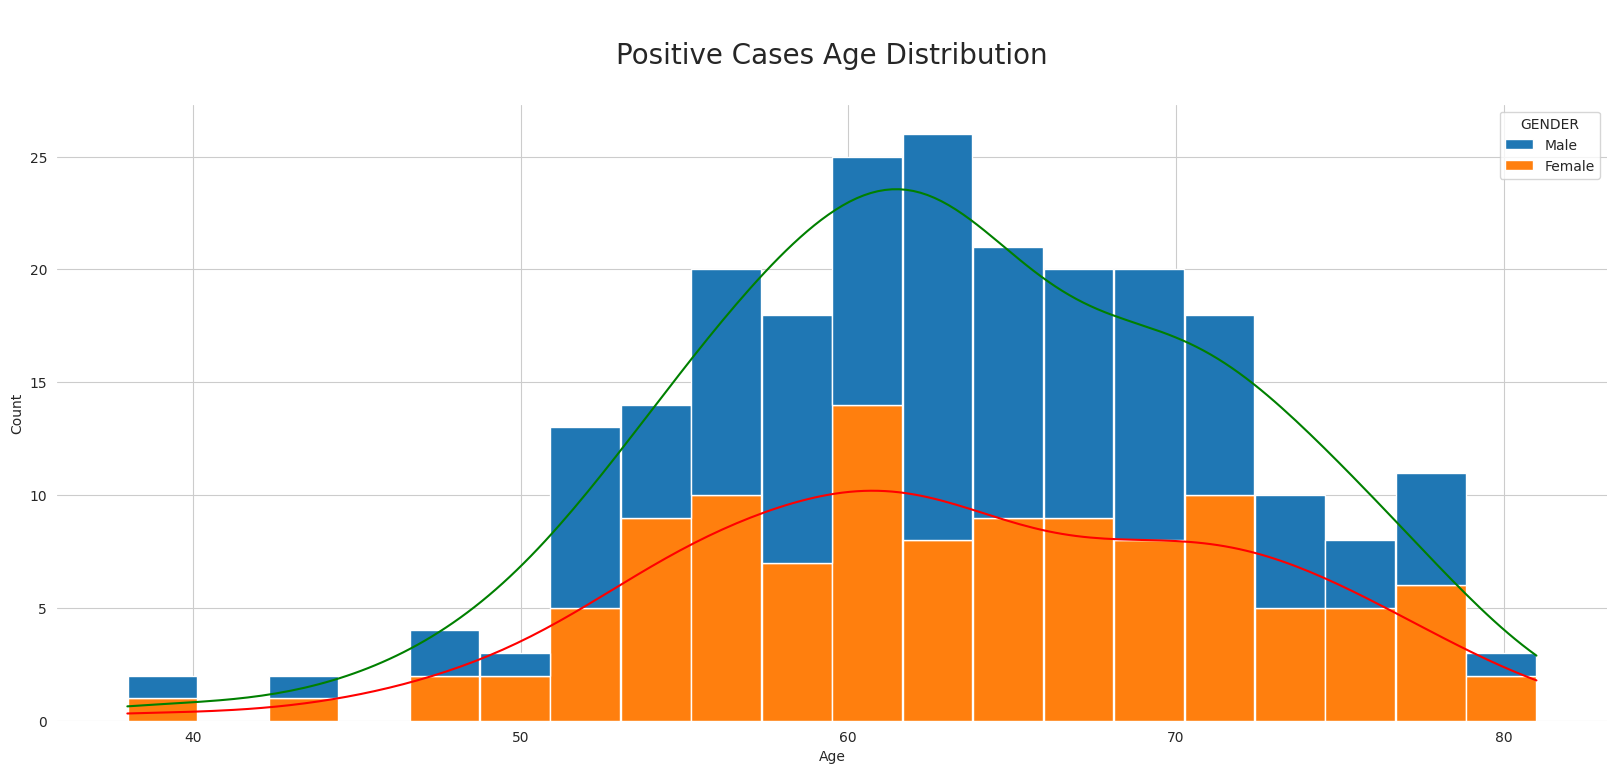

In [14]:
plt.subplots(figsize=(20, 8))
pallette=['black','red','green']
p = sns.histplot(data=data_temp_positive,x="AGE",hue="GENDER",multiple="stack",kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(pallette[1])
p.axes.lines[1].set_color(pallette[2])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

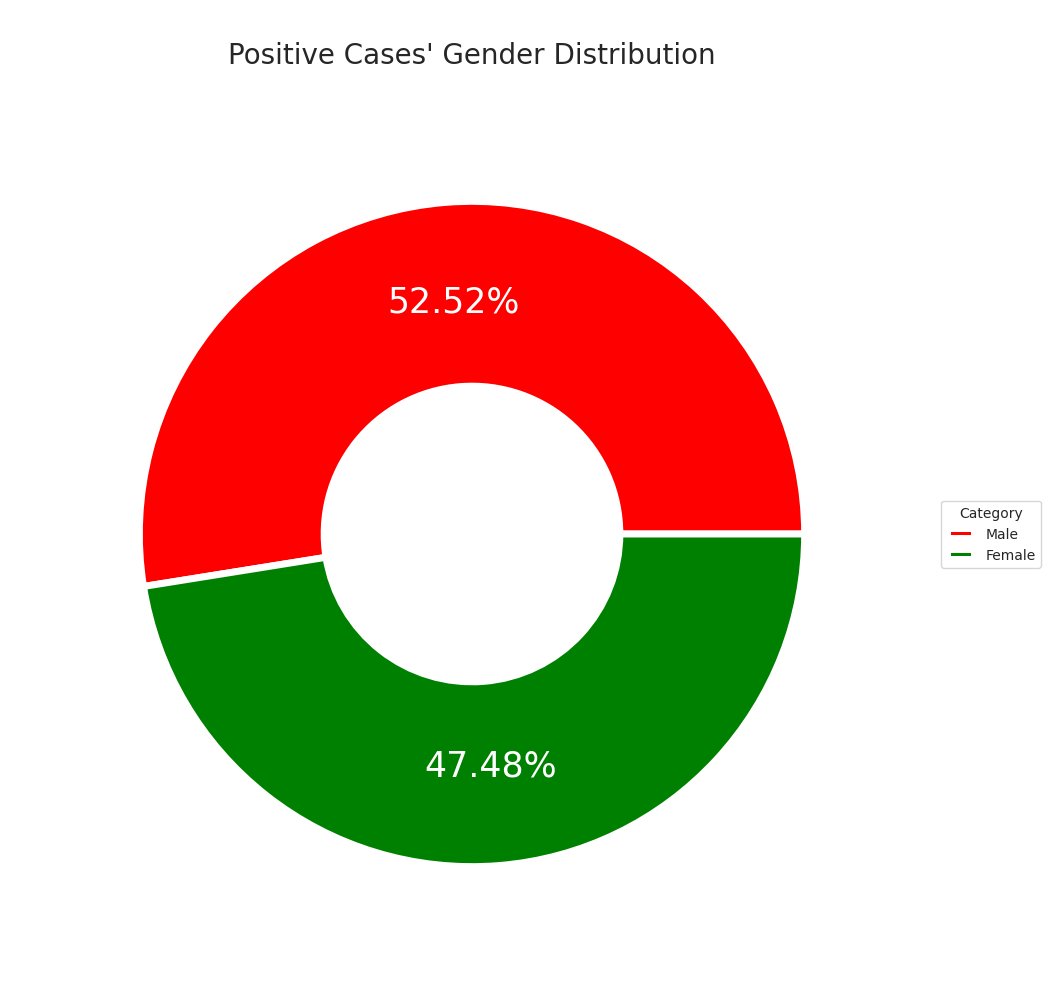

In [15]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts,autotexts = plt.pie([len(data_temp_positive[data_temp_positive["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_positive[data_temp_positive["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = ["red","green"],
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

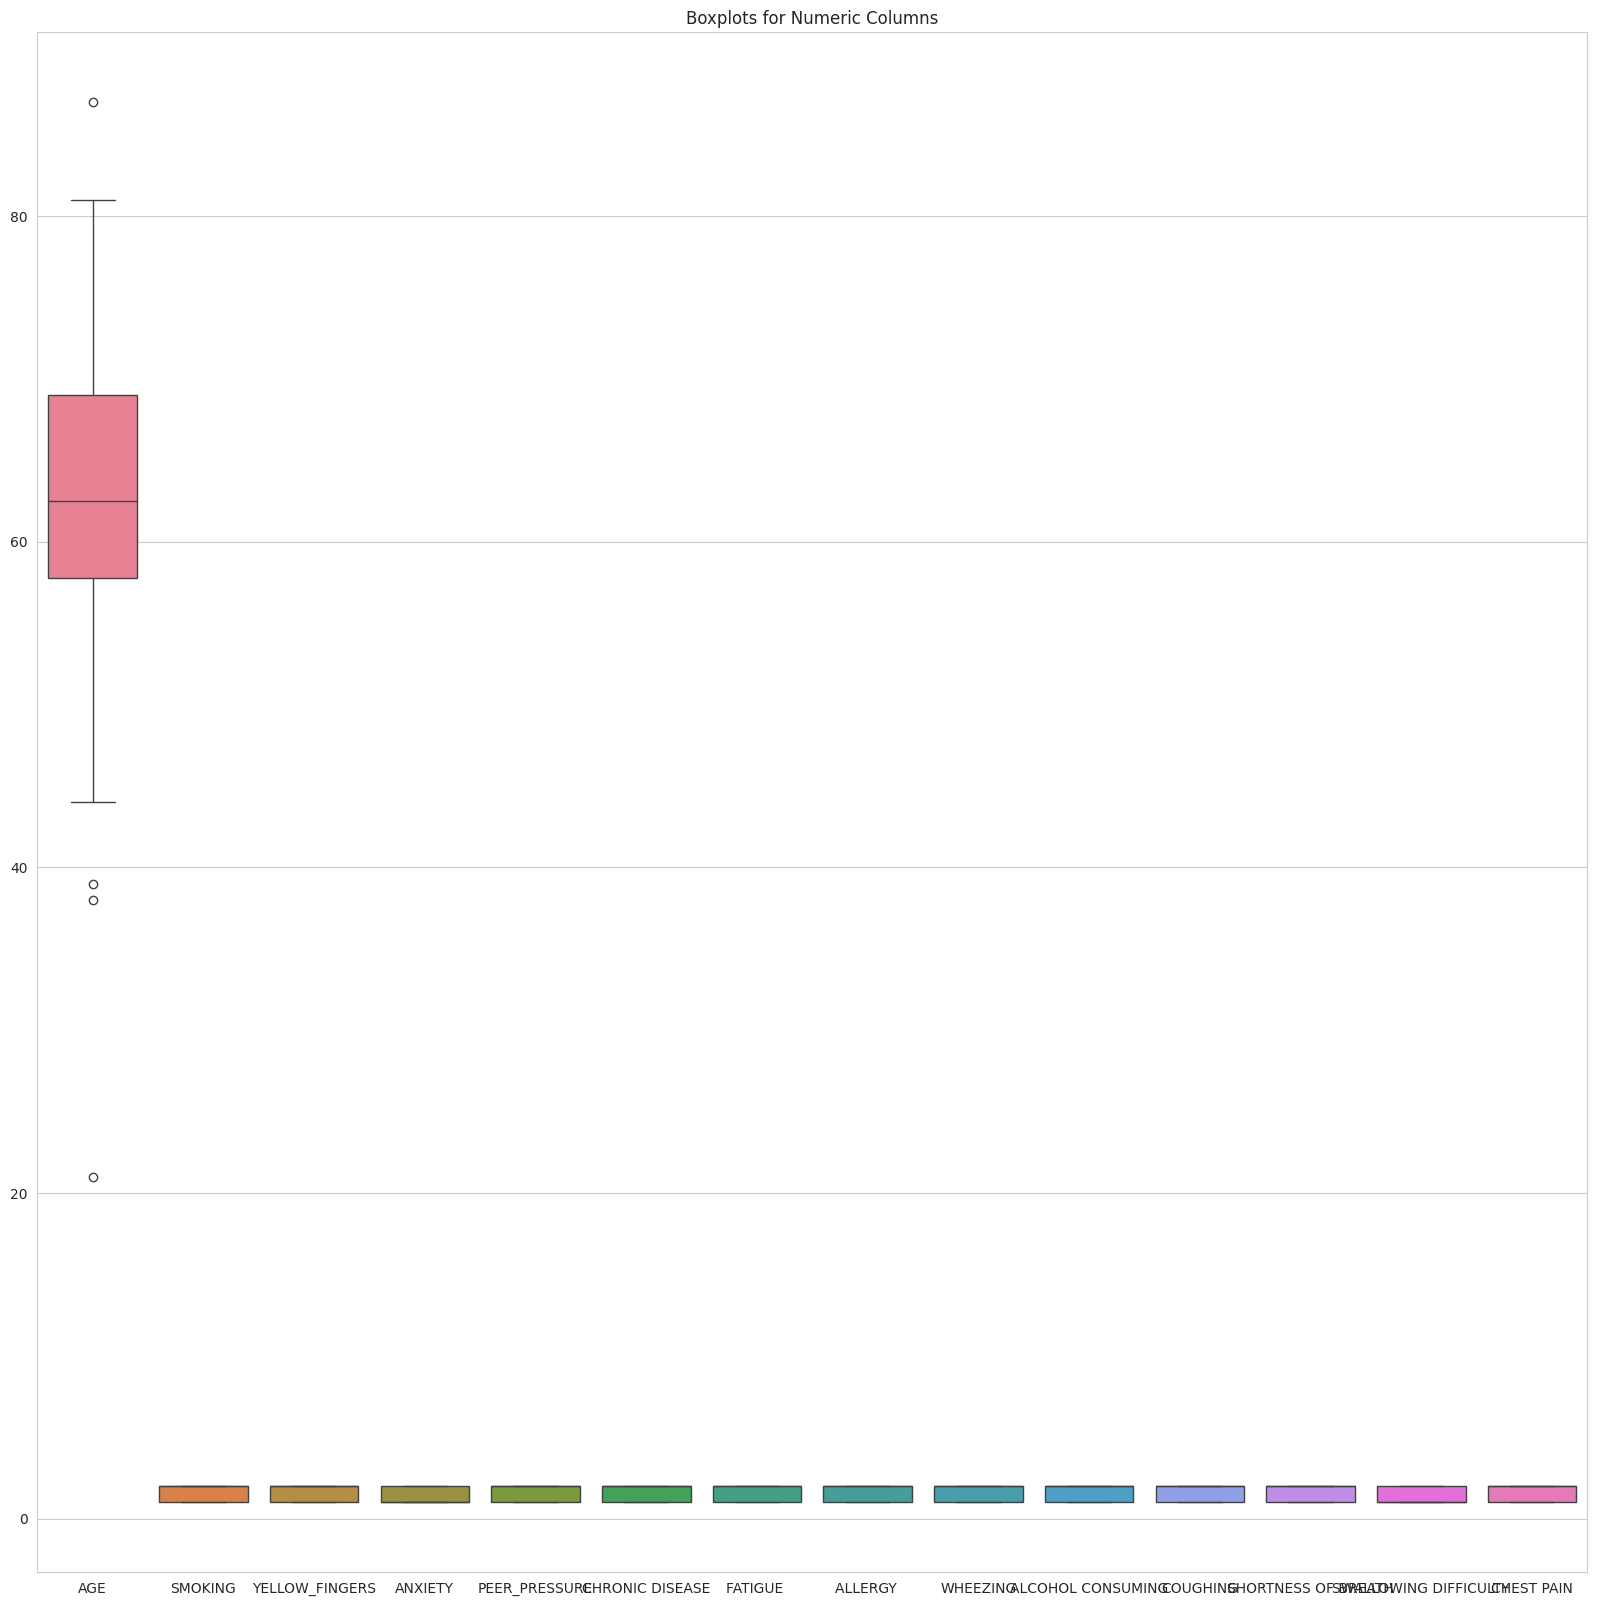

In [16]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(20, 20))
sns.boxplot(data=data)
plt.title("Boxplots for Numeric Columns")
plt.show()

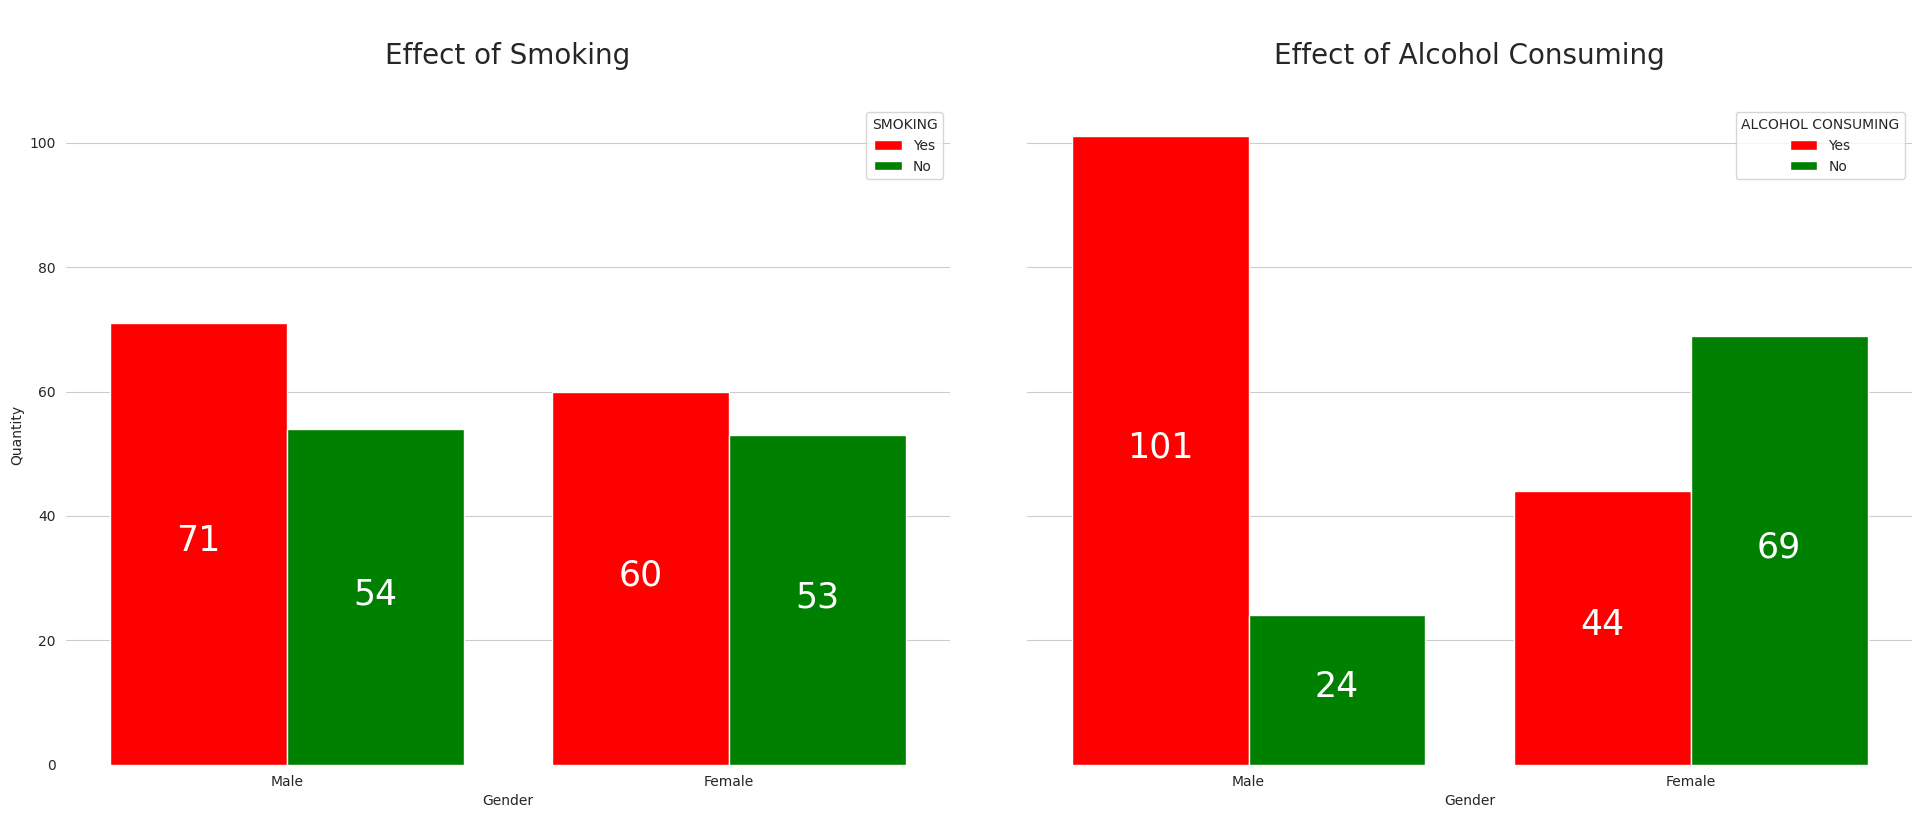

In [17]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_positive,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["red","green"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_positive,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["red","green"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

In [18]:

LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head()

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,1,0,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,1,0,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,0,1,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,1,0,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,0,1,1,1,2,2,1,1,1,2,1,1,1,2,0


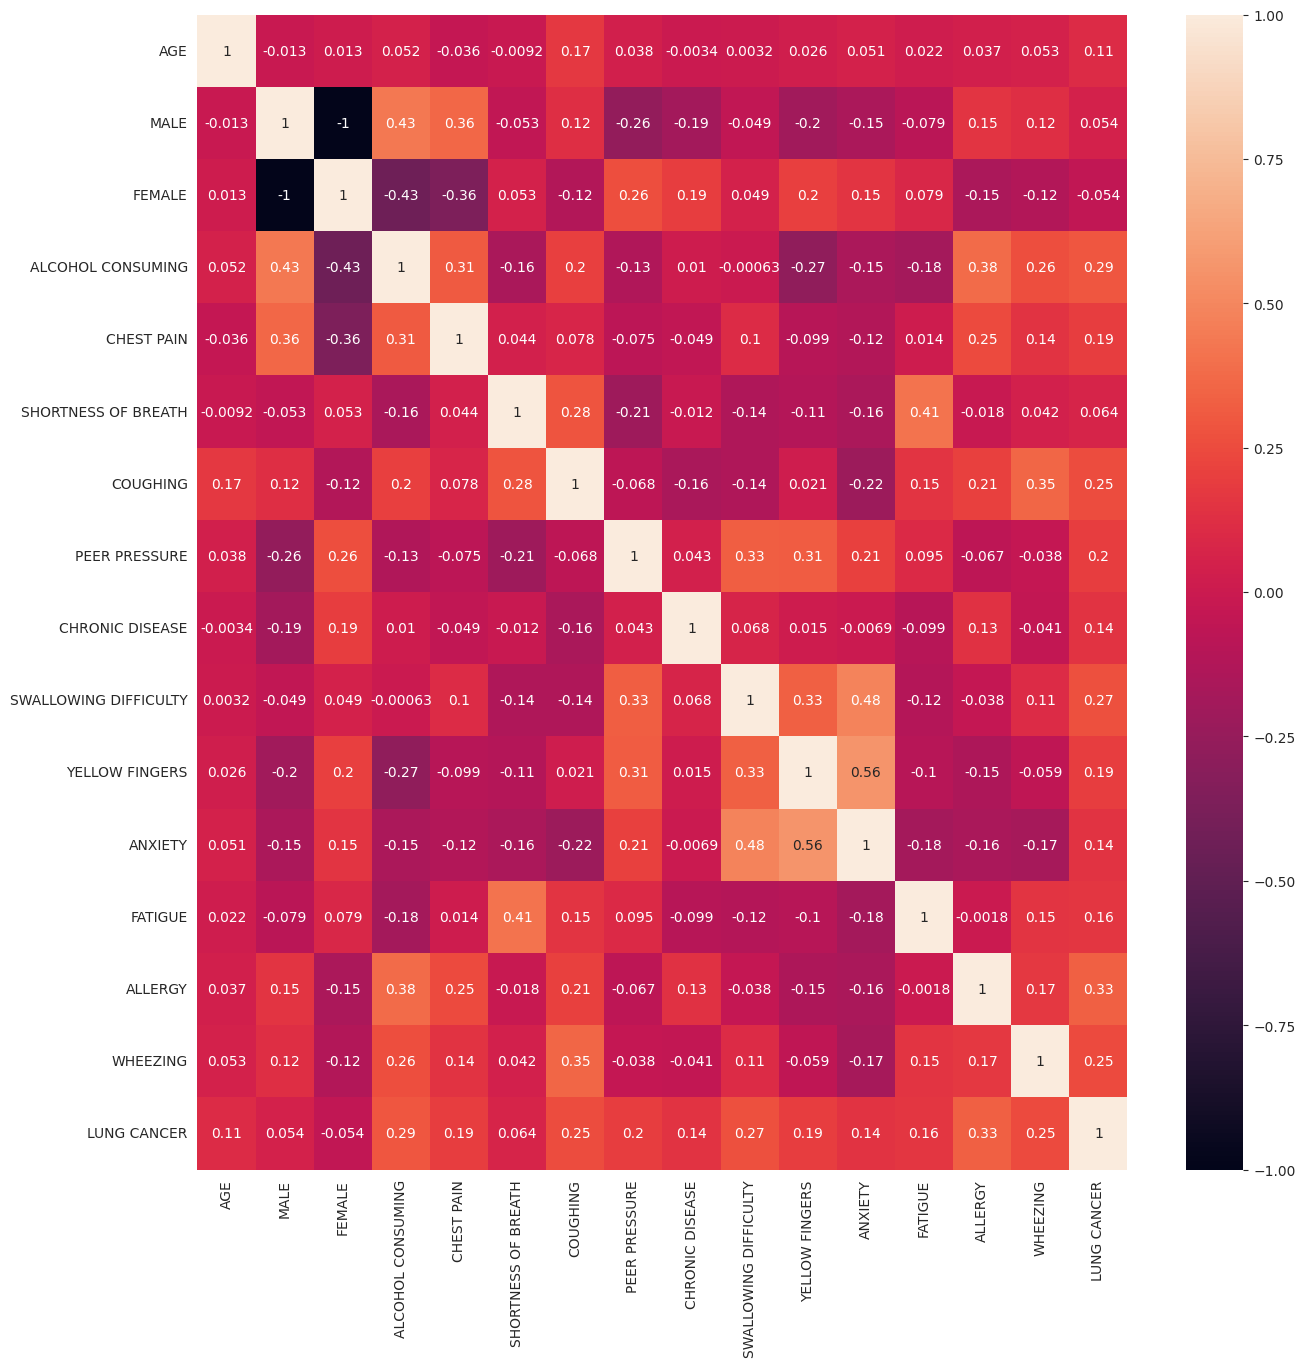

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor='black')
plt.show()

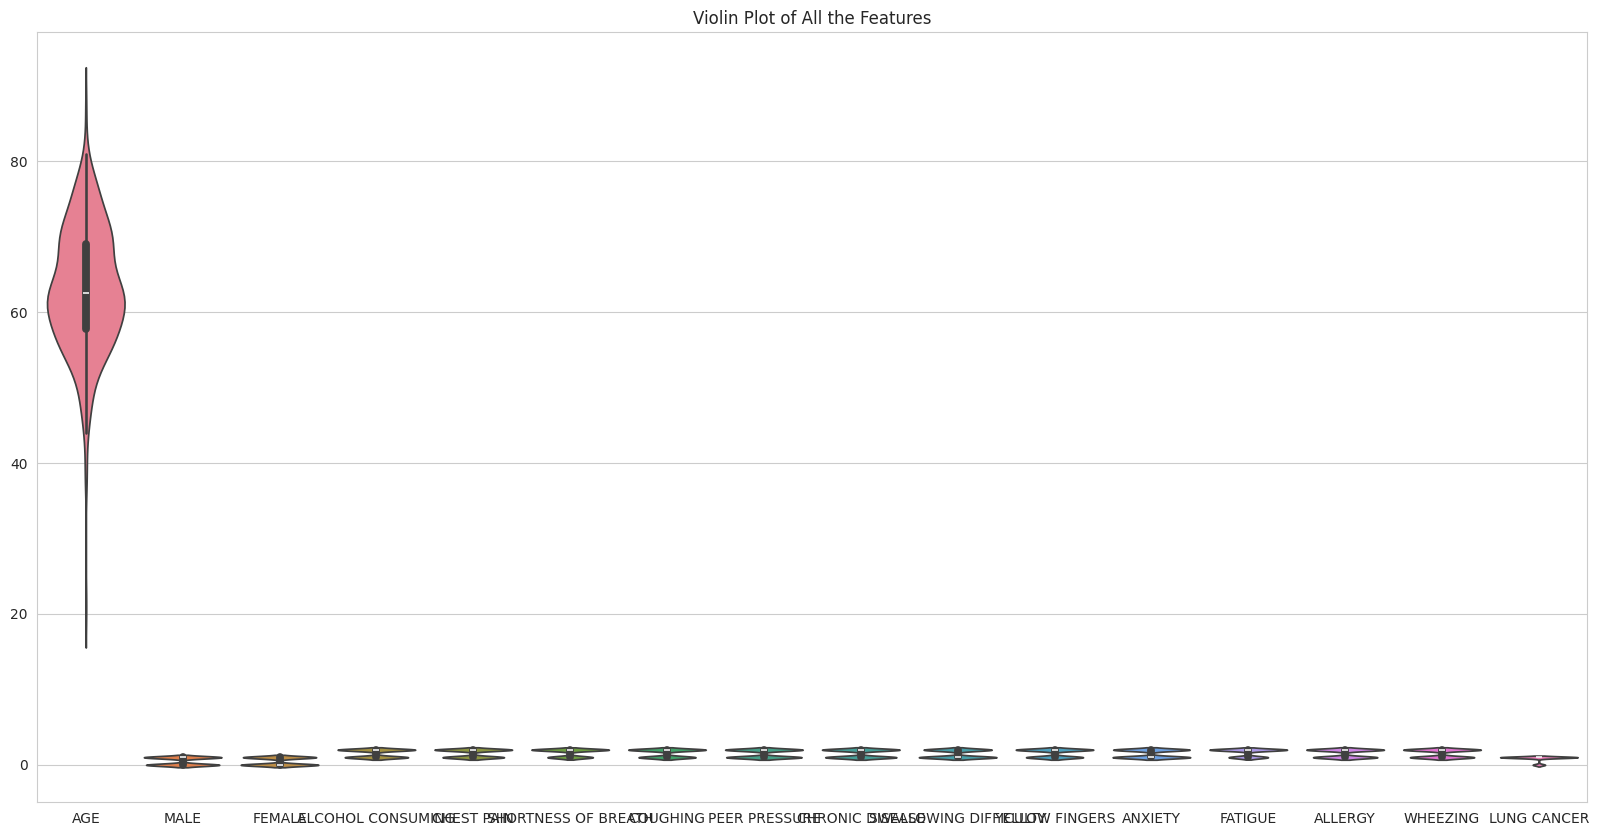

In [20]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=data)
plt.title("Violin Plot of All the Features")
plt.show()

#PREPROCESSING FOR CLASSIFICATION

In [21]:
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]



scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


In [22]:
print(x_train)

[[-0.34784366 -1.02941804  1.02941804 ...  0.71287918  0.90984316
  -1.09909053]
 [-2.9781135  -1.02941804  1.02941804 ...  0.71287918  0.90984316
   0.90984316]
 [ 0.48906038 -1.02941804  1.02941804 ... -1.40276225 -1.09909053
  -1.09909053]
 ...
 [-1.66297858 -1.02941804  1.02941804 ... -1.40276225  0.90984316
  -1.09909053]
 [ 1.68463758 -1.02941804  1.02941804 ...  0.71287918 -1.09909053
  -1.09909053]
 [ 1.08684898 -1.02941804  1.02941804 ...  0.71287918 -1.09909053
  -1.09909053]]


# LOGISTIC REGRESSION

In [23]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)

print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56


The Accuracy of Logistic Regression is 87.5 %


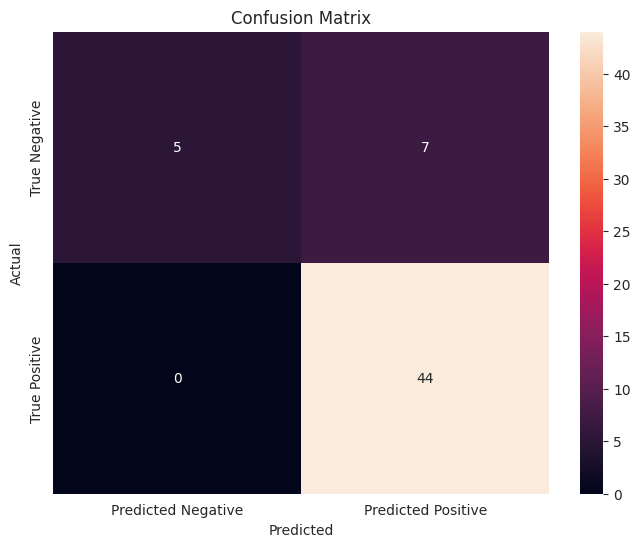

In [24]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf, annot=True, fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [25]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Support Vector Machine is 85.71 %


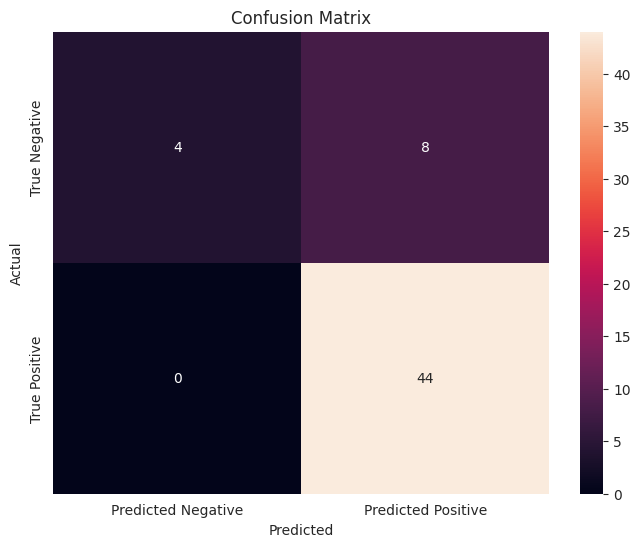

In [26]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf, annot=True, fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# GAUSSIAN NAIVE BAYES

In [27]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Gaussian Naive Bayes is 91.07 %


# RANDOM FOREST CLASSIFIER

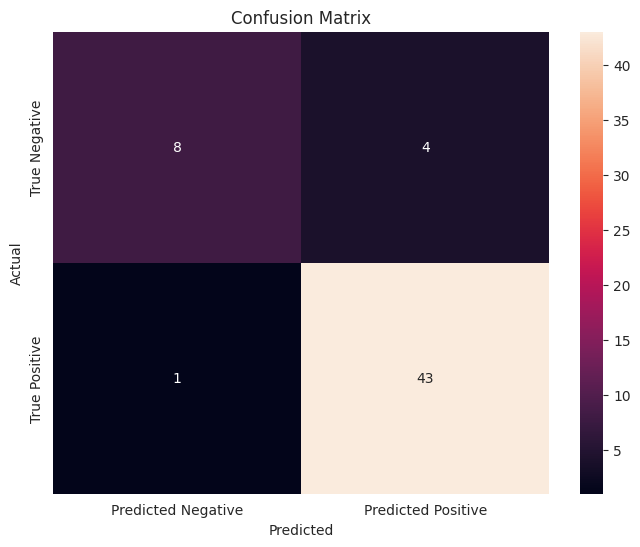

In [28]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_conf, annot=True, fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Random Forest Classifier is 85.71 %


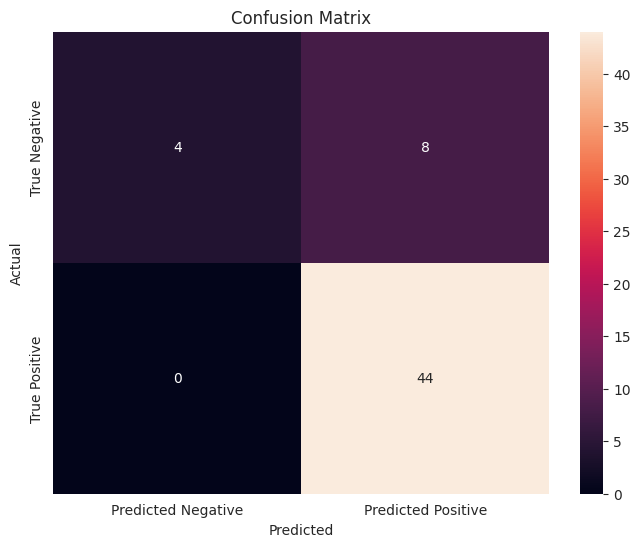

In [30]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(rfg_conf, annot=True, fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# BERNOULLI NAIVE BAYES

In [31]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Bernoulli Naive Bayes is 91.07 %


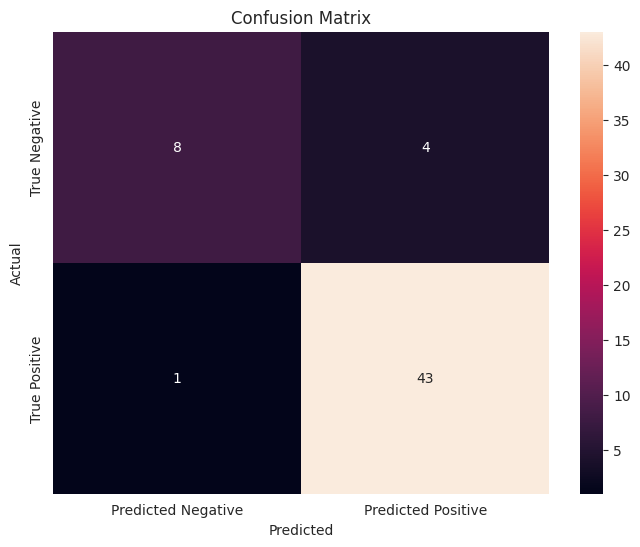

In [32]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(bnb_conf, annot=True, fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# DEPLOYMENT

getting pickle files for streamlit deployment

In [33]:
with open('modelbnb.pkl', 'wb') as f:
    pickle.dump(bnb, f)


In [34]:
with open('modellr.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [35]:
with open('modelrfg.pkl', 'wb') as f:
    pickle.dump(rfg, f)

In [36]:
with open('modelgnb.pkl', 'wb') as f:
    pickle.dump(gnb, f)

In [37]:
with open('modelsvm.pkl', 'wb') as f:
    pickle.dump(svm, f)

Colab link: https://colab.research.google.com/drive/1E6smaTjMHv6MAKTu_eH90ASOj2AxNLVc?usp=sharing

In [38]:
!pip install streamlit -q

In [39]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session bd73403ae1b3c70


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.73.3:8501

npx: installed 22 in 4.169s
your url is: https://all-taxes-grow.loca.lt
  Stopping...
^C


# REFERNCES

DATASET

https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer